In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
print(sys.executable)

e:\Course\Aamir\project 3\coding\.venv\Scripts\python.exe


In [193]:
data=pd.read_csv("e:\\Course\\Aamir\\project 3\\train.csv")

In [194]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [195]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for i in numerical_features:
    print(i, data[i].min(), data[i].max())


id 0 1199999
Age 18.0 64.0
Annual Income 1.0 149997.0
Number of Dependents 0.0 4.0
Health Score 2.0122371818911766 58.97591405405534
Previous Claims 0.0 9.0
Vehicle Age 0.0 19.0
Credit Score 300.0 849.0
Insurance Duration 1.0 9.0
Premium Amount 20.0 4999.0


In [196]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [197]:
for feature in numerical_features:
    print(feature,data[feature].mean())
# Impute categorical features with mode
for feature in categorical_features:
    print(feature,data[feature].mode()[0])

id 599999.5
Age 41.145563131986506
Annual Income 32745.21777653108
Number of Dependents 2.0099337080218063
Health Score 25.61390769251925
Previous Claims 1.002689088497089
Vehicle Age 9.569888682776748
Credit Score 592.9243502134415
Insurance Duration 5.018219181849318
Premium Amount 1102.5448216666666
Gender Male
Marital Status Single
Education Level Master's
Occupation Employed
Location Suburban
Policy Type Premium
Policy Start Date 2020-02-08 15:21:39.134960
Customer Feedback Average
Smoking Status Yes
Exercise Frequency Weekly
Property Type House


In [198]:
data.dropna().head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0
15,15,18.0,Male,6076.0,Married,2.0,High School,Employed,7.442964,Urban,...,1.0,12.0,584.0,5.0,2020-10-17 15:21:39.209847,Good,Yes,Monthly,Apartment,849.0


In [199]:
data[data["Premium Amount"]==2476.0]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
178,178,64.0,Male,40512.0,Married,4.0,PhD,Unemployed,25.826544,Rural,...,1.0,4.0,764.0,7.0,2020-11-13 15:21:39.155231,Good,No,Weekly,House,2476.0
13169,13169,45.0,Male,20963.0,Married,4.0,Bachelor's,Employed,24.924652,Suburban,...,NaN,7.0,582.0,5.0,2020-10-23 15:21:39.245086,Average,Yes,Monthly,Apartment,2476.0
25091,25091,63.0,Female,30372.0,Divorced,NaN,Master's,Unemployed,22.505599,Urban,...,2.0,3.0,420.0,1.0,2022-04-14 15:21:39.255696,Poor,Yes,Daily,Apartment,2476.0
45759,45759,21.0,Female,85904.0,Single,1.0,PhD,Employed,27.724595,Suburban,...,NaN,16.0,805.0,6.0,2019-08-21 15:21:39.193945,Poor,No,Monthly,House,2476.0
50197,50197,39.0,Male,16043.0,Single,NaN,Bachelor's,Unemployed,22.825761,Rural,...,0.0,2.0,577.0,3.0,2020-06-01 15:21:39.261856,Poor,Yes,Rarely,Condo,2476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168690,1168690,52.0,Female,44712.0,Single,4.0,Master's,Unemployed,37.788286,Urban,...,NaN,15.0,NaN,7.0,2022-08-25 15:21:39.271453,Poor,No,Monthly,House,2476.0
1186141,1186141,36.0,Female,6862.0,Single,2.0,High School,Self-Employed,32.586928,Rural,...,NaN,17.0,615.0,3.0,2020-07-14 15:21:39.079128,Poor,No,Weekly,House,2476.0
1187872,1187872,33.0,Male,3086.0,Single,2.0,High School,Employed,25.554163,Rural,...,NaN,12.0,569.0,8.0,2021-08-23 15:21:39.263607,Good,Yes,Monthly,Apartment,2476.0
1191804,1191804,21.0,Male,47957.0,Married,0.0,Master's,NaN,33.078284,Suburban,...,NaN,19.0,728.0,9.0,2021-09-11 15:21:39.257696,NaN,No,Rarely,House,2476.0


In [200]:
data["Credit Score"].median()

np.float64(595.0)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [202]:
data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [203]:
data.shape

(1200000, 21)

In [204]:
# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)
data.shape

(1200000, 21)

In [205]:
data.drop('Policy Start Date',axis=1,inplace=True)
data.drop('id',axis=1,inplace=True)

In [206]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [207]:
data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()

['Age',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Occupation',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Customer Feedback']

In [208]:
categorical_features=data.select_dtypes(include=['object']).columns.to_list()
categorical_features

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [209]:
numerical_features=data.select_dtypes(include=['int64','float64']).columns.to_list()
numerical_features

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

In [ ]:
#check the distribution

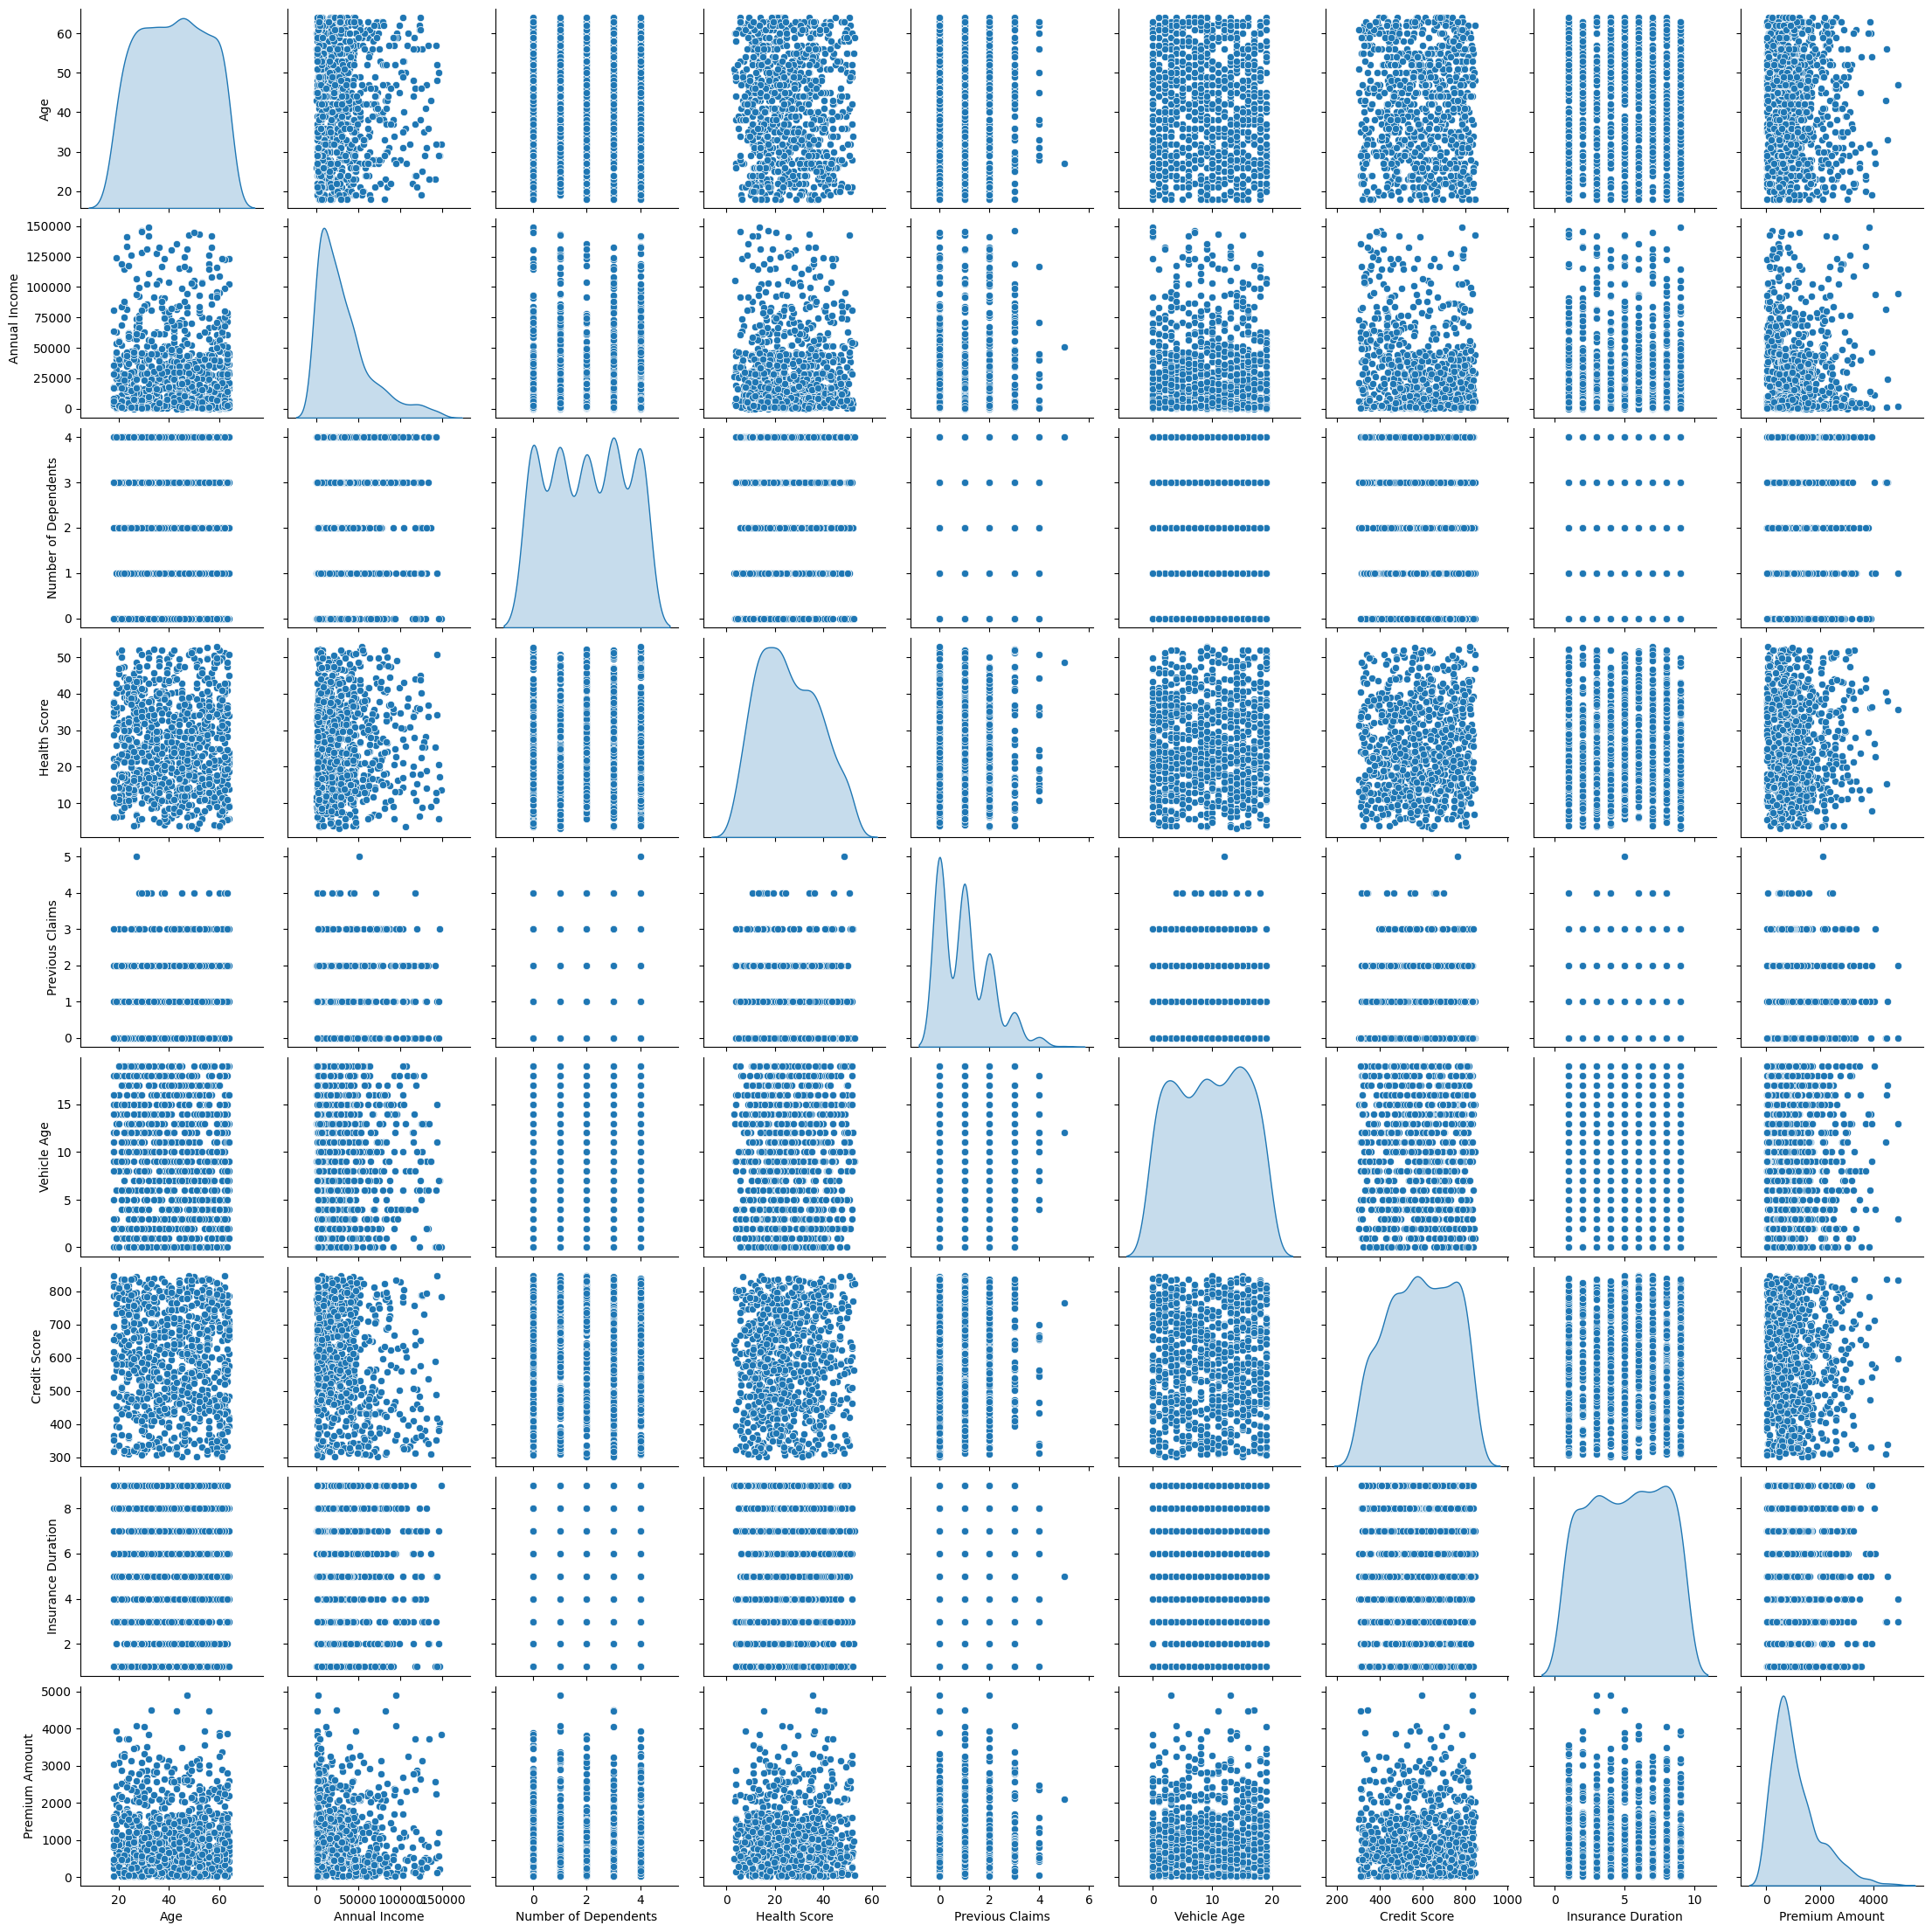

In [156]:
#Example with diag_kind parameter.
sns.pairplot(data.sample(1000), diag_kind='kde') #kernel density estimates in diagonal plots
plt.show()

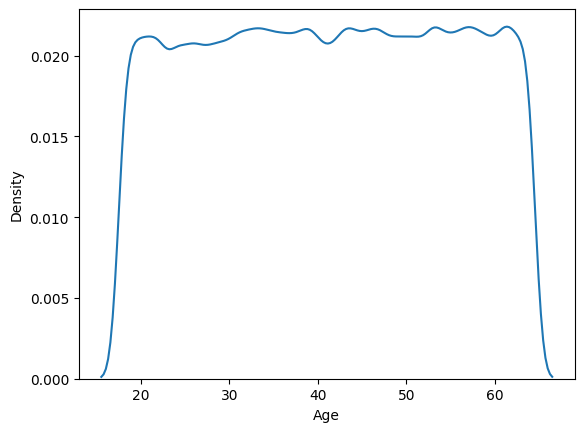

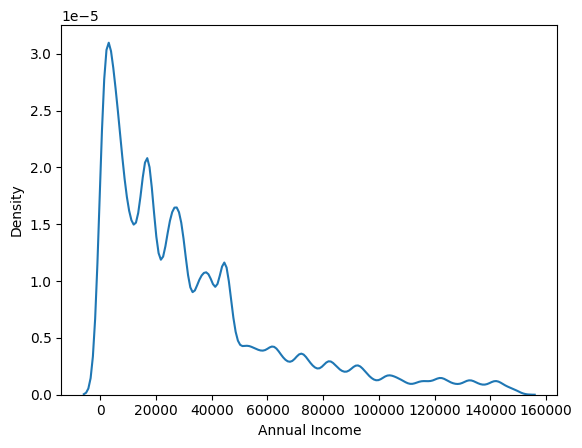

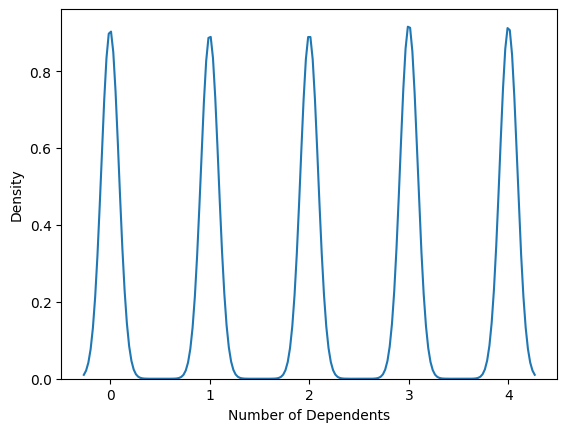

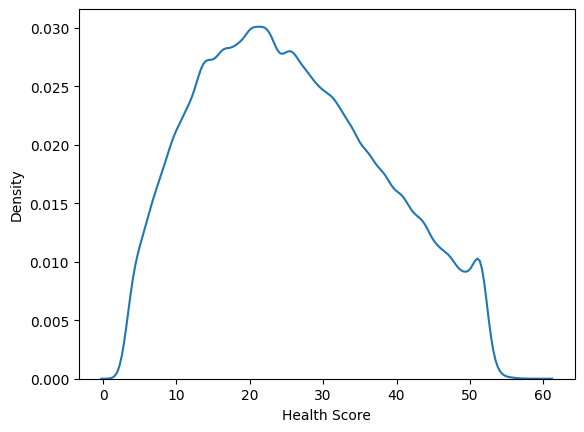

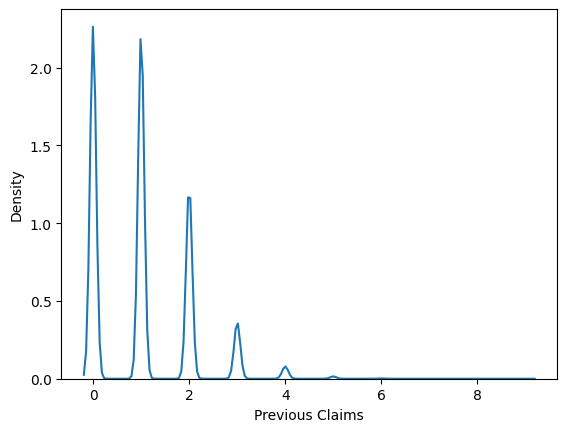

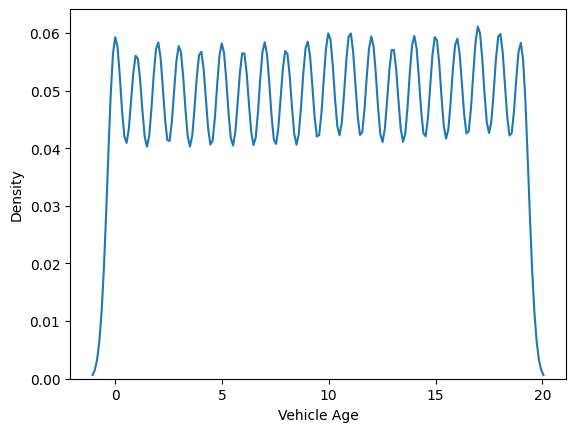

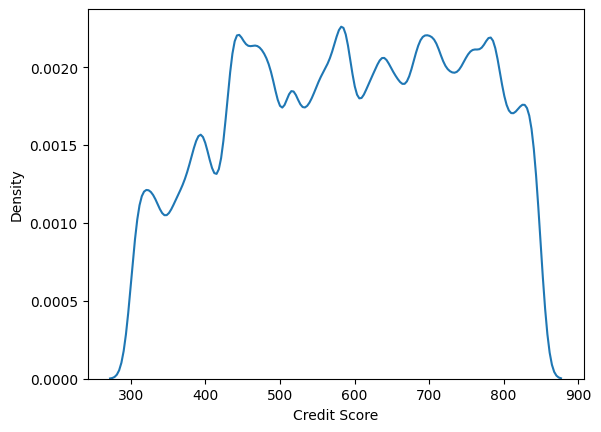

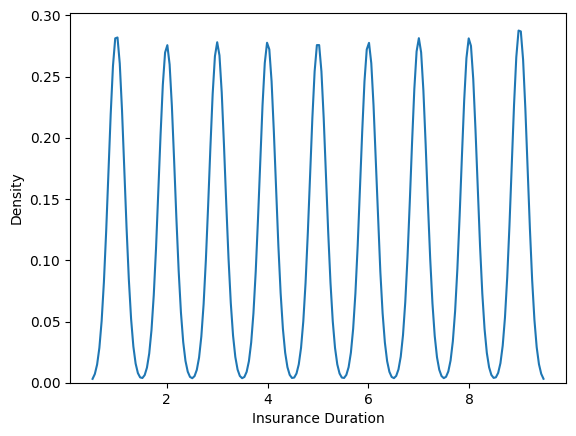

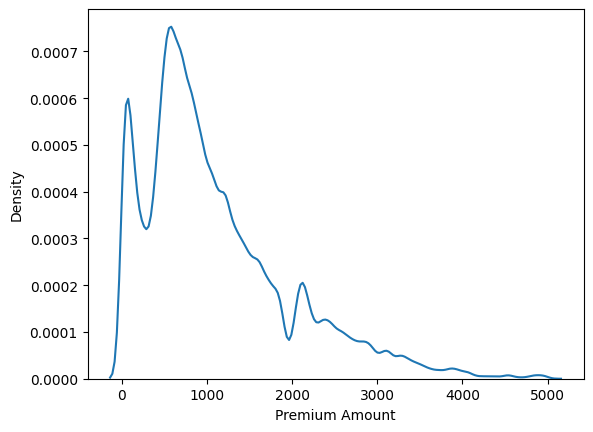

In [157]:
for i in numerical_features:
    sns.kdeplot(data[i])
    plt.show()

Imputations

Modularising Imputations

In [210]:
def imputations():
    
    print("=====Columns with Null values======")
    columns_with_nulls=data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()
    print("Columns with null values\n",columns_with_nulls)

    numerical_features,categorical_features=[],[]
    for i in data.columns.to_list():
          if data[i].dtype == 'object':
            categorical_features.append(i)
          else:
            numerical_features.append(i)
    


    print("===========")
    print("Numerical columns List:- ",numerical_features,len(numerical_features),sep="\n")
    print("===========")
    print("Categorical columns List:- ",categorical_features,len(categorical_features),sep="\n")

    #impute non-series data

    # Impute numerical features with median
    for feature in numerical_features:
        data[feature].fillna(data[feature].median(), inplace=True)

    # Impute categorical features with mode
    for feature in categorical_features:
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    
    print("=====Columns with Null values======")
    columns_with_nulls=data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()
    print("Columns with null values\n",columns_with_nulls)


imputations()

=====Columns with Null values======
Columns with null values
 ['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback']
Numerical columns List:- 
['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
9
Categorical columns List:- 
['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
10
=====Columns with Null values======
Columns with null values
 []


In [211]:
data.to_csv('E:/Course/Aamir/project 3/preprocessing/train_Imputed.csv',index=False)

In [212]:
data=pd.read_csv('E:/Course/Aamir/project 3/preprocessing/train_Imputed.csv')

Feature Grouping

In [213]:
data.describe(include="all")

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1200000,1.200000e+06,1200000,1.200000e+06,1200000,1200000,1.200000e+06,1200000,1200000,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1200000,1200000,1200000,1200000,1.200000e+06
unique,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,3,2,4,3,NaN
top,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,Average,Yes,Weekly,House,NaN
freq,NaN,602571,NaN,413920,NaN,303818,640825,NaN,401542,401846,NaN,NaN,NaN,NaN,455729,601873,306179,400349,NaN
mean,4.114329e+01,NaN,3.241431e+04,NaN,2.009026e+00,NaN,NaN,2.555000e+01,NaN,NaN,1.001873e+00,9.569891e+00,5.931628e+02,5.018219e+00,NaN,NaN,NaN,NaN,1.102545e+03
std,1.343402e+01,NaN,3.161560e+04,NaN,1.351022e+00,NaN,NaN,1.182343e+01,NaN,NaN,8.203294e-01,5.776174e+00,1.411041e+02,2.594330e+00,NaN,NaN,NaN,NaN,8.649989e+02
min,1.800000e+01,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.012237e+00,NaN,NaN,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,NaN,NaN,NaN,NaN,2.000000e+01
25%,3.000000e+01,NaN,8.646000e+03,NaN,1.000000e+00,NaN,NaN,1.655457e+01,NaN,NaN,0.000000e+00,5.000000e+00,4.840000e+02,3.000000e+00,NaN,NaN,NaN,NaN,5.140000e+02
50%,4.100000e+01,NaN,2.391100e+04,NaN,2.000000e+00,NaN,NaN,2.457865e+01,NaN,NaN,1.000000e+00,1.000000e+01,5.950000e+02,5.000000e+00,NaN,NaN,NaN,NaN,8.720000e+02
75%,5.300000e+01,NaN,4.393600e+04,NaN,3.000000e+00,NaN,NaN,3.377289e+01,NaN,NaN,1.000000e+00,1.500000e+01,7.060000e+02,7.000000e+00,NaN,NaN,NaN,NaN,1.509000e+03


In [214]:
data.isna().sum().reset_index()[data.isna().sum().reset_index()[0] > 0] ["index"].to_list()

[]

In [215]:
data.head(20)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,595.0,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,Employed,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,Employed,24.578648,Rural,Basic,2.0,8.0,807.0,6.0,Poor,No,Weekly,House,439.0
7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,Average,No,Rarely,Condo,111.0
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,Employed,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,Average,No,Monthly,Condo,213.0
9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,Poor,No,Daily,Condo,64.0


In [216]:
for i in ['Age','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']:
    print(f'{i}: {data[i].min()} {data[i].max()} {data[i].dtype}')

Age: 18.0 64.0 float64
Number of Dependents: 0.0 4.0 float64
Health Score: 2.0122371818911766 58.97591405405534 float64
Previous Claims: 0.0 9.0 float64
Vehicle Age: 0.0 19.0 float64
Credit Score: 300.0 849.0 float64
Insurance Duration: 1.0 9.0 float64


In [217]:
feature_bins = {
    'Age': [18.0, 30.0, 40.0, 50.0, 64.0, float('inf')],
    'Number of Dependents': [0.0, 1.0, 2.0, 3.0, float('inf')],
    'Health Score': [0.0, 15.0, 25.0, 35.0, float('inf')],
    'Previous Claims': [0.0, 1.0, 2.0, float('inf')],
    'Vehicle Age': [0.0, 5.0, 10.0, 20.0, float('inf')],
    'Credit Score': [0.0, 300.0, 600.0, 800.0, float('inf')],
    'Insurance Duration': [0.0, 3.0, 6.0, 9.0, float('inf')],
}
for feature, bins in feature_bins.items():
    data[feature] = pd.cut(data[feature], bins=bins, labels=False, right=True,include_lowest=True).astype(int)

In [218]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,Female,10049.0,Married,0,Bachelor's,Self-Employed,1,Urban,Premium,1,2,1,1,Poor,No,Weekly,House,2869.0
1,1,Female,31678.0,Divorced,2,Master's,Employed,1,Rural,Comprehensive,0,2,2,0,Average,Yes,Monthly,House,1483.0
2,0,Male,25602.0,Divorced,2,High School,Self-Employed,3,Suburban,Premium,0,2,1,0,Good,Yes,Weekly,House,567.0
3,0,Male,141855.0,Married,1,Bachelor's,Employed,0,Rural,Basic,0,0,1,0,Poor,Yes,Daily,Apartment,765.0
4,0,Male,39651.0,Single,0,Bachelor's,Self-Employed,1,Rural,Premium,0,1,1,1,Poor,Yes,Weekly,House,2022.0


In [219]:
data.isna().sum().reset_index()[data.isna().sum().reset_index()[0] > 0] ["index"].to_list()

[]

In [220]:
data.describe(include="all")

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1200000,1.200000e+06,1200000,1.200000e+06,1200000,1200000,1.200000e+06,1200000,1200000,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1200000,1200000,1200000,1200000,1.200000e+06
unique,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,3,2,4,3,NaN
top,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,Average,Yes,Weekly,House,NaN
freq,NaN,602571,NaN,413920,NaN,303818,640825,NaN,401542,401846,NaN,NaN,NaN,NaN,455729,601873,306179,400349,NaN
mean,1.552020e+00,NaN,3.241431e+04,NaN,1.190796e+00,NaN,NaN,1.465330e+00,NaN,NaN,2.431608e-01,1.159897e+00,1.509931e+00,1.005769e+00,NaN,NaN,NaN,NaN,1.102545e+03
std,1.171539e+00,NaN,3.161560e+04,NaN,1.115180e+00,NaN,NaN,1.059018e+00,NaN,NaN,5.361690e-01,8.524711e-01,6.340991e-01,8.182215e-01,NaN,NaN,NaN,NaN,8.649989e+02
min,0.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,2.000000e+01
25%,0.000000e+00,NaN,8.646000e+03,NaN,0.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5.140000e+02
50%,2.000000e+00,NaN,2.391100e+04,NaN,1.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,8.720000e+02
75%,3.000000e+00,NaN,4.393600e+04,NaN,2.000000e+00,NaN,NaN,2.000000e+00,NaN,NaN,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,NaN,NaN,NaN,NaN,1.509000e+03


Label encoding

In [221]:
le  = LabelEncoder()

In [222]:
categorical_features

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [223]:
#Mapping ordered features

mapping_definitions = {
    "Education Level": ["High School", "Bachelor's", "Master's", "PhD"],
    "Customer Feedback": ["Poor", "Average", "Good"],
    "Exercise Frequency": ["Rarely", "Weekly", "Monthly", "Daily"],
    "Policy Type": ["Basic", "Comprehensive", "Premium"]
}
for column, categories in mapping_definitions.items():
    mapping = {category: index for index, category in enumerate(categories)}
    data[column]=data[column].replace(mapping).astype(int)

In [224]:
#convert categorical (non-numeric) values into integers.

for col in ['Gender', 'Marital Status','Occupation','Location','Smoking Status','Property Type']:
    data[col] = le.fit_transform(data[col])

In [225]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,0,10049.0,1,0,1,1,1,2,2,1,2,1,1,0,0,1,2,2869.0
1,1,0,31678.0,0,2,2,0,1,0,1,0,2,2,0,1,1,2,2,1483.0
2,0,1,25602.0,0,2,0,1,3,1,2,0,2,1,0,2,1,1,2,567.0
3,0,1,141855.0,1,1,1,0,0,0,0,0,0,1,0,0,1,3,0,765.0
4,0,1,39651.0,2,0,1,1,1,0,2,0,1,1,1,0,1,1,2,2022.0


In [226]:
data.to_csv('E:/Course/Aamir/project 3/preprocessing/train_featured_encoded.csv',index=False)

In [227]:
data=pd.read_csv('E:/Course/Aamir/project 3/preprocessing/train_featured_encoded.csv')

In [63]:
data.to_csv('E:/Course/Aamir/project 3/preprocessing/train_featured_encoded.csv',index=False)

In [64]:
data=pd.read_csv('E:/Course/Aamir/project 3/preprocessing/train_featured_encoded.csv')

Control Outliers

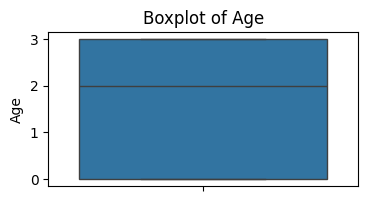

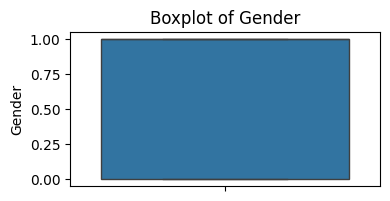

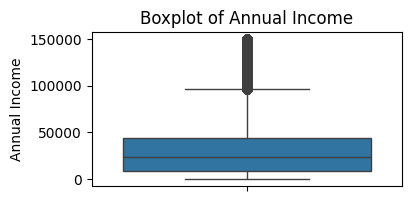

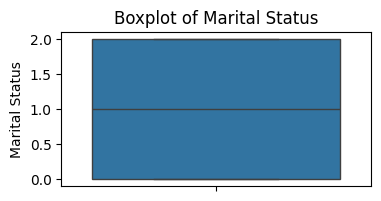

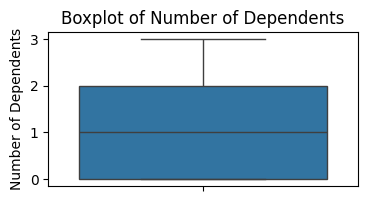

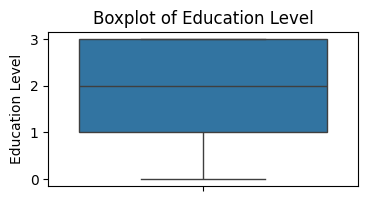

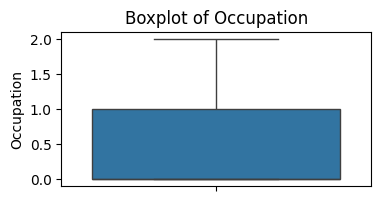

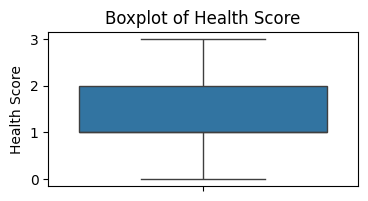

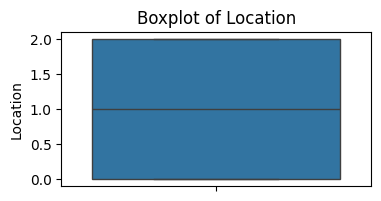

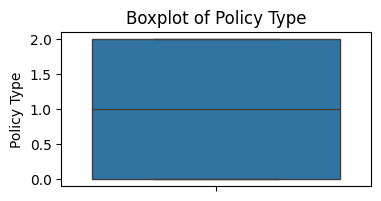

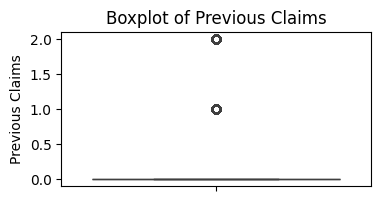

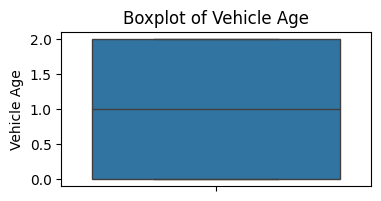

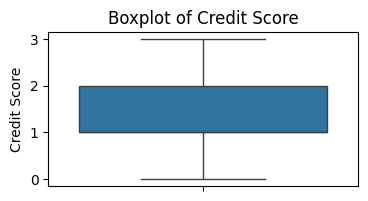

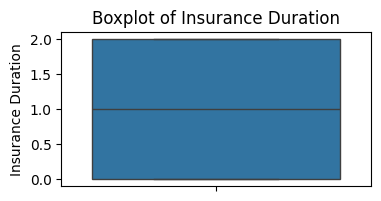

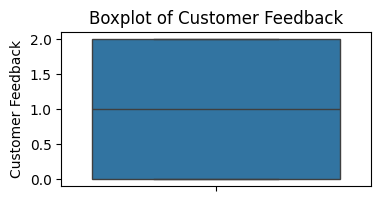

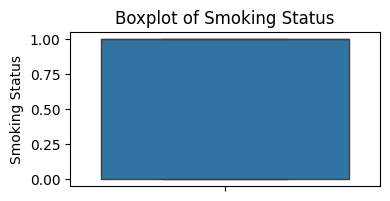

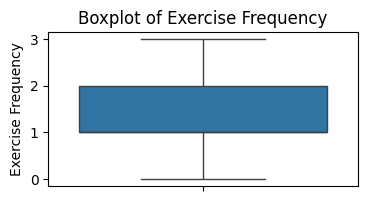

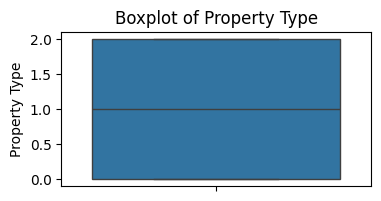

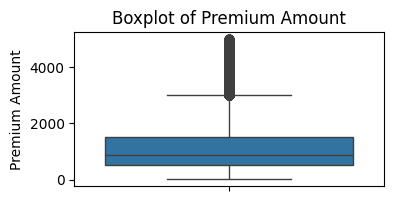

In [228]:
features=data.select_dtypes(include=['int64','float64']).columns.to_list()


for feature in features:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [232]:
from scipy.stats import skew

# Check skewness before transformation
print("Skewness before transformation:", skew(data['Annual Income']))
# Check skewness before transformation
print("Skewness before transformation:", skew(data['Premium Amount']))

Skewness before transformation: 1.5229518441468473
Skewness before transformation: 1.240913942144198


In [233]:
outlier_features = ['Annual Income', 'Premium Amount']

In [234]:
d1=pd.DataFrame()

In [235]:
# Apply sqrrt transformation
d1['Annual Income'] = np.sqrt(data['Annual Income'])
d1['Premium Amount'] = np.sqrt(data['Premium Amount'])

# Check skewness after transformation
print("Skewness of Annual Income after log transformation:", skew(d1['Annual Income']))
print("Skewness of Premium Amount after log transformation:", skew(d1['Premium Amount']))

Skewness of Annual Income after log transformation: 0.4971842968379204
Skewness of Premium Amount after log transformation: 0.1992705885494775


In [236]:
d1.to_csv('E:\\Course\\Aamir\\project 3\\transformed data\\sqrt_transformed.csv', index=False)


In [237]:
# Apply log transformation
d1['Annual Income'] = np.log1p(data['Annual Income'])
d1['Premium Amount'] = np.log1p(data['Premium Amount'])

# Check skewness after transformation
print("Skewness of Annual Income after log transformation:", skew(d1['Annual Income']))
print("Skewness of Premium Amount after log transformation:", skew(d1['Premium Amount']))

Skewness of Annual Income after log transformation: -1.0450332712802888
Skewness of Premium Amount after log transformation: -1.2558873578553604


In [238]:
d1.to_csv('E:\\Course\\Aamir\\project 3\\transformed data\\log_transformed.csv', index=False)


In [239]:
from scipy.stats import skew

In [240]:
# Apply Box-Cox transformation
data['Annual Income'], income_lambda = stats.boxcox(data['Annual Income'])  # Add 1 to handle zero values
data['Premium Amount'], premium_lambda = stats.boxcox(data['Premium Amount'])

# Check skewness after transformation
print("Skewness of Annual Income after boxcox transformation:", skew(data['Annual Income']),"lambda values for inverse tranforamtion",income_lambda)
print("Skewness of Premium Amount after boxcox transformation:", skew(data['Premium Amount']),"lambda values for inverse tranforamtion",premium_lambda)

Skewness of Annual Income after boxcox transformation: -0.07184855199360686 lambda values for inverse tranforamtion 0.27918767051768856
Skewness of Premium Amount after boxcox transformation: -0.05840459215786854 lambda values for inverse tranforamtion 0.39923211193791314


income_lambda=0.28752315071173057

premium_lambda=0.3992321289235637

In [129]:
print(data['Annual Income'].min())
print(data['Premium Amount'].min())


1.0
20.0


In [241]:
data.to_csv('E:\\Course\\Aamir\\project 3\\transformed data\\boxcox_transformed.csv', index=False)

In [242]:
data[data["Premium Amount"]<0]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


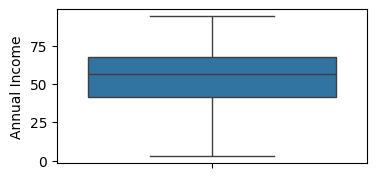

Skewness after boxcox transformation+capping: Annual Income -0.07761163004074884


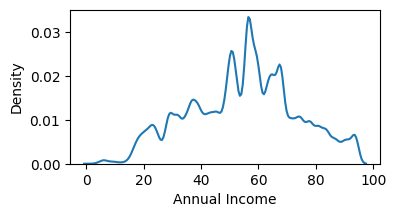

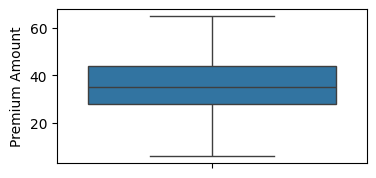

Skewness after boxcox transformation+capping: Premium Amount -0.09026777800308668


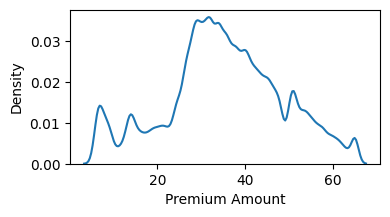

In [189]:
for feature in outlier_features:

    ##capping upper limit

    cap_value = data[feature].quantile(0.99)

    # Calculate the lower whisker for the transformed data
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR

    data[feature] = data[feature].clip(upper=cap_value,lower=lower_whisker)

    plt.figure(figsize=(4,2))
    sns.boxplot(data[feature])
    plt.show()

    # Check skewness after transformation
    print("Skewness after boxcox transformation+capping:",feature, skew(data[feature]))

    plt.figure(figsize=(4,2))
    sns.kdeplot(data[feature])
    plt.show()

In [190]:
d1 = data[outlier_features].copy()


In [191]:
Q1 = d1['Annual Income'].quantile(0.25)
Q3 = d1['Annual Income'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR

print("Lower whisker value for Annual Income:", lower_whisker)

Lower whisker value for Annual Income: 2.647941704863065


In [192]:
# Check the number of outliers near 0

outliers = d1[d1['Annual Income'] < lower_whisker]
print("Number of outliers near 0:", len(outliers))
print(outliers)
print(outliers[['Annual Income']].describe())

Number of outliers near 0: 0
Empty DataFrame
Columns: [Annual Income, Premium Amount]
Index: []
       Annual Income
count            0.0
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN


In [137]:
# Calculate the lower whisker for the transformed data
Q1 = d1['Annual Income'].quantile(0.25)
Q3 = d1['Annual Income'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
print("Lower Whisker Value (Transformed Data):", lower_whisker)

# Cap near-zero values at the lower whisker
d1['Annual Income'] = d1['Annual Income'].clip(lower=lower_whisker)

# Verify the capping
print("Capped Annual Income for row 1013454:", d1.loc[1013454, 'Annual Income'])

Lower Whisker Value (Transformed Data): 6.62665119436995
Capped Annual Income for row 1013454: 6.62665119436995


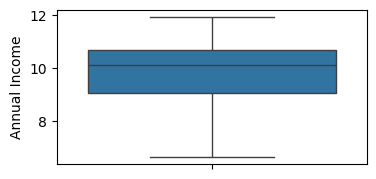

Skewness of Annual Income after boxcox transformation+capping: -0.766468338179797


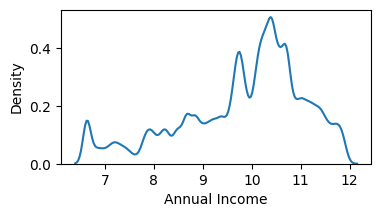

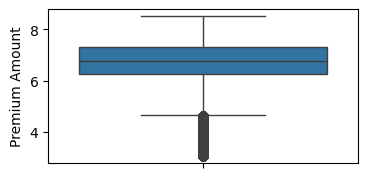

Skewness of Annual Income after boxcox transformation+capping: -1.2558873578553604


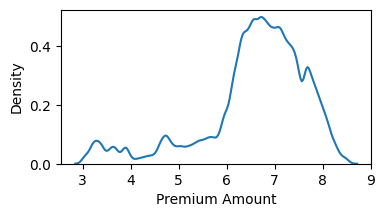

In [56]:
for feature in outlier_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(d1[feature])
    plt.show()

    # Check skewness after transformation
    print("Skewness of Annual Income after boxcox transformation+capping:", skew(d1[feature]))

    plt.figure(figsize=(4,2))
    sns.kdeplot(d1[feature])
    plt.show()

In [57]:
data.loc[data.index==1013454]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1013454,0,0,1.527688,2,0,1,0,2,2,1,0,1,2,2,2,0,3,0,50.221706


In [58]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
d1['Annual Income'] = pt.fit_transform(data[['Annual Income']])
d1['Premium Amount'] = pt.fit_transform(data[['Premium Amount']])

# Check skewness after transformation
print("Skewness of Annual Income after Yeo-Johnson transformation:", skew(d1['Annual Income']))
print("Skewness of Premium Amount after Yeo-Johnson transformation:", skew(d1['Premium Amount']))

Skewness of Annual Income after Yeo-Johnson transformation: -0.08670244190982974
Skewness of Premium Amount after Yeo-Johnson transformation: -0.0752187303273016


In [59]:
# Apply reciprocal transformation
d1['Annual Income'] = 1 / (data['Annual Income'] + 1)  # Add 1 to avoid division by zero
d1['Premium Amount'] = 1 / (data['Premium Amount'] + 1)

# Check skewness after transformation
print("Skewness of Annual Income after reciprocal transformation:", skew(d1['Annual Income']))
print("Skewness of Premium Amount after reciprocal transformation:", skew(d1['Premium Amount']))

Skewness of Annual Income after reciprocal transformation: 5.230575311759591
Skewness of Premium Amount after reciprocal transformation: 2.782083170174544


In [60]:
print(data[outlier_features].max())
print("=========")
print(data[outlier_features].min())

Annual Income     101.150911
Premium Amount     65.072331
dtype: float64
Annual Income     1.527688
Premium Amount    5.778188
dtype: float64


In [61]:
# Capping outliers at the 99th percentile
#Replace outliers with a specified percentile value.
for feature in outlier_features:
    cap_value = data[feature].quantile(0.99)
    data[feature] = data[feature].clip(upper=cap_value)

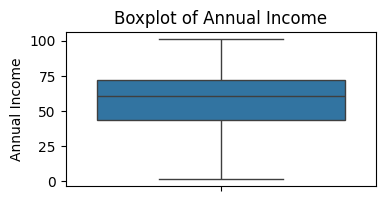

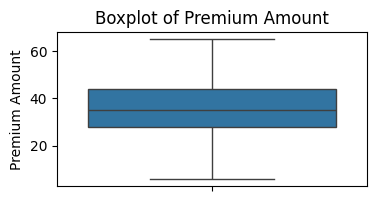

In [62]:
for feature in outlier_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

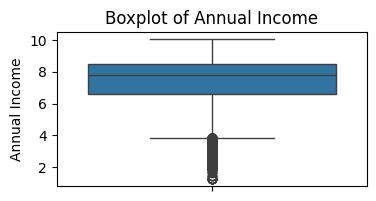

In [63]:
plt.figure(figsize=(4,2))
sns.boxplot(np.sqrt(data['Annual Income']))
plt.title(f"Boxplot of {'Annual Income'}")
plt.show()

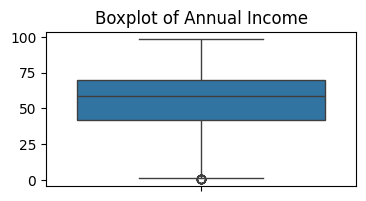

In [64]:
value,a=stats.boxcox(data['Annual Income'])
plt.figure(figsize=(4,2))
sns.boxplot(y= value)
plt.title(f"Boxplot of {'Annual Income'}")
plt.show()

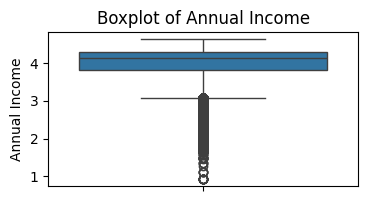

In [65]:
plt.figure(figsize=(4,2))
sns.boxplot(np.log1p(data['Annual Income']))
plt.title(f"Boxplot of {'Annual Income'}")
plt.show()

In [66]:
data['Annual Income']=np.sqrt(data['Annual Income'])

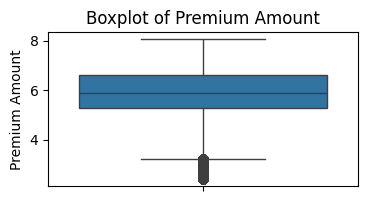

In [67]:
plt.figure(figsize=(4,2))
sns.boxplot(np.sqrt(data['Premium Amount']))
plt.title(f"Boxplot of {'Premium Amount'}")
plt.show()

In [68]:
data['Premium Amount']=np.sqrt(data['Premium Amount'])

In [69]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,0,6.762350,1,0,1,1,1,2,2,1,2,1,1,0,0,1,2,7.592224
1,1,0,8.060773,0,2,2,0,1,0,1,0,2,2,0,1,1,2,2,6.611473
2,0,1,7.804515,0,2,0,1,3,1,2,0,2,1,0,2,1,1,2,5.383255
3,0,1,10.057381,1,1,1,0,0,0,0,0,0,1,0,0,1,3,0,5.742696
4,0,1,8.339082,2,0,1,1,1,0,2,0,1,1,1,0,1,1,2,7.056970


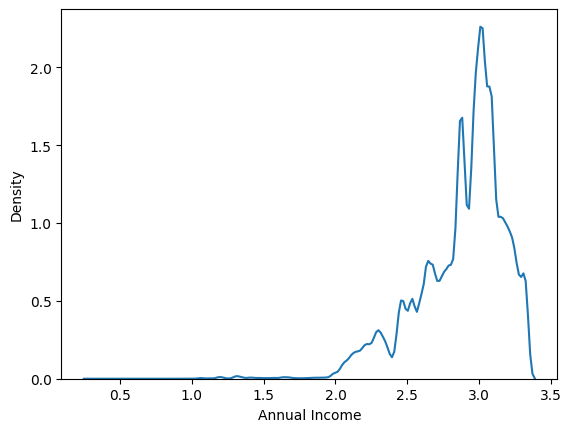

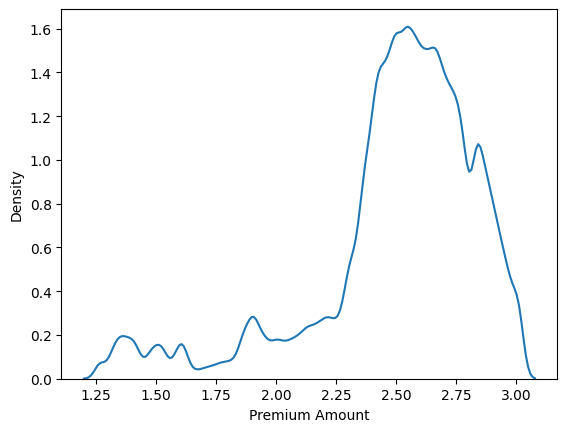

In [70]:
for i in outlier_features:
    sns.kdeplot(np.log2(data[i]))
    plt.show()

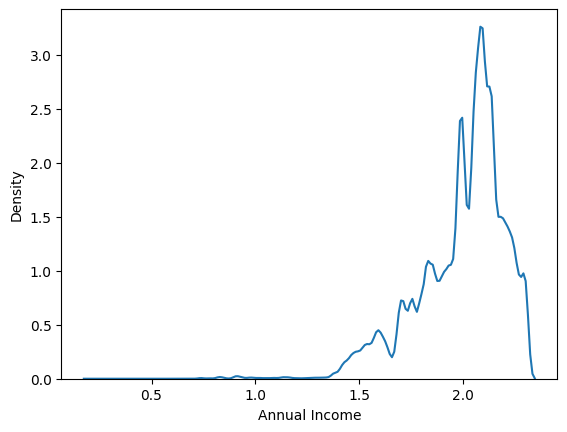

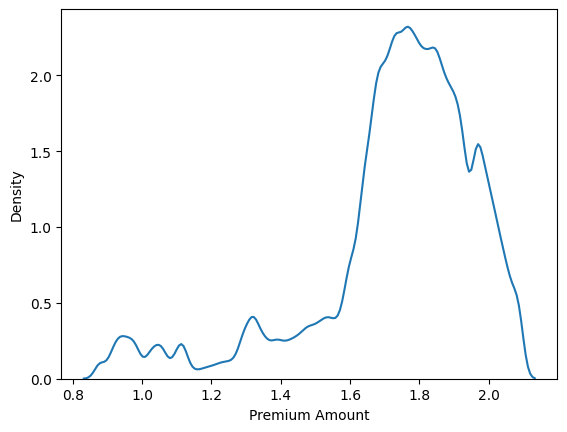

In [71]:
for i in outlier_features:
    sns.kdeplot(np.log(data[i]))
    plt.show()

Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

# Define numerical features (excluding the target variable)
numerical_features = ['Annual Income']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [73]:
print(data.head())

   Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0    0       0      -0.533312               1                     0   
1    1       0       0.387292               0                     2   
2    0       1       0.205601               0                     2   
3    0       1       1.802921               1                     1   
4    0       1       0.584618               2                     0   

   Education Level  Occupation  Health Score  Location  Policy Type  \
0                1           1             1         2            2   
1                2           0             1         0            1   
2                0           1             3         1            2   
3                1           0             0         0            0   
4                1           1             1         0            2   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0                1            2             1                   1   
1       

In [74]:
data.to_csv('E:/Course/Aamir/project 3/preprocessing/train_tranformed_scaled.csv',index=False)

In [75]:
data=pd.read_csv('E:/Course/Aamir/project 3/preprocessing/train_tranformed_scaled.csv')
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,0,-0.533312,1,0,1,1,1,2,2,1,2,1,1,0,0,1,2,7.592224
1,1,0,0.387292,0,2,2,0,1,0,1,0,2,2,0,1,1,2,2,6.611473
2,0,1,0.205601,0,2,0,1,3,1,2,0,2,1,0,2,1,1,2,5.383255
3,0,1,1.802921,1,1,1,0,0,0,0,0,0,1,0,0,1,3,0,5.742696
4,0,1,0.584618,2,0,1,1,1,0,2,0,1,1,1,0,1,1,2,7.056970


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
